In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
from datetime import date as dt


# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement=Base.classes.measurement
Station=Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session=Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# get all datas from database of Measurement
measures=session.query(Measurement).all()


In [11]:
# get all datas from database of Station
stations=session.query(Station).all()

In [12]:
# Get a list of column names and types in "measurement" DB
inspector = inspect(engine)
m_columns = inspector.get_columns('Measurement')
for c in m_columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [13]:
# Get a list of column names and types in "station" DB
inspector = inspect(engine)
s_columns = inspector.get_columns('Station')
for c in s_columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [14]:
# Find the most recent date in the data set in "Measurement"
m_most_recent_date=session.query(Measurement.date).order_by((Measurement.date).desc()).first()
m_most_recent_date

('2017-08-23',)

In [15]:
# Find the most recent date in the data set in "Station"
s_most_recent_date=session.query(Measurement.date).order_by((Measurement.date).desc()).first()
s_most_recent_date

('2017-08-23',)

### Design a query to retrieve the last 12 months of precipitation data. 

In [16]:
# Calculate the date one year from the last date in data set.
# Perform a query to retrieve the data and precipitation scores
last_one_year_data = session.query(Measurement.date, Measurement.prcp).\
                            filter((Measurement.date >'2016-08-23')).\
                            order_by(Measurement.date).all()
last_one_year_data
#len(last_one_year_data)

[('2016-08-24', 2.0),
 ('2016-08-24', 54.6),
 ('2016-08-24', 57.9),
 ('2016-08-24', None),
 ('2016-08-24', 31.0),
 ('2016-08-24', 54.6),
 ('2016-08-24', 36.8),
 ('2016-08-25', 2.0),
 ('2016-08-25', 2.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 5.3),
 ('2016-08-25', 1.5),
 ('2016-08-25', 2.8),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.8),
 ('2016-08-26', 0.5),
 ('2016-08-26', 1.0),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.3),
 ('2016-08-27', 0.0),
 ('2016-08-27', 4.6),
 ('2016-08-27', 0.5),
 ('2016-08-27', 0.0),
 ('2016-08-27', 3.0),
 ('2016-08-27', None),
 ('2016-08-28', 0.3),
 ('2016-08-28', 3.6),
 ('2016-08-28', 3.6),
 ('2016-08-28', 3.6),
 ('2016-08-28', 15.2),
 ('2016-08-28', 52.6),
 ('2016-08-29', 0.0),
 ('2016-08-29', 4.3),
 ('2016-08-29', 1.0),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),
 ('2016-08-29', 8.9),
 ('2016-08-29', 22.9),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.5),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-30', 1.3),

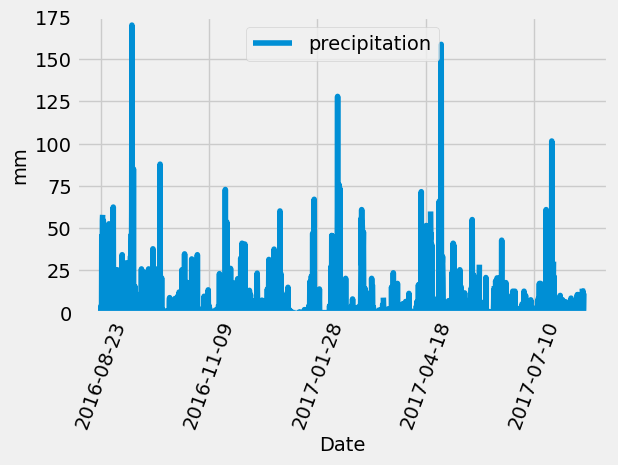

In [136]:
# plot the results
# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(last_one_year_data, columns=['date','precipitation'])

# Sort the data by date
df.set_index('date')

# Use Pandas Plotting with Matplotlib to plot the data
df.plot(x='date',y='precipitation')
plt.xlabel('Date')
plt.ylabel('mm')
plt.xticks(rotation=70)
plt.ylim(0,175)
plt.tight_layout()
plt.show()

In [137]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,4.505888
std,11.713487
min,0.000000
25%,0.000000
50%,0.500000
75%,3.300000
max,170.200000


# Exploratory Station Analysis

In [148]:
# Design a query to calculate the total number of stations in the dataset
session.query(func.count(Station.name)).scalar()

9

In [155]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.

active_station=session.query(Measurement.station,func.count(Measurement.station)).\
                            group_by(Measurement.station).\
                            order_by(func.count(Measurement.station).desc()).all()
active_station

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [163]:
most_active_station=active_station[0]
most_active_station

('USC00519281', 2772)

In [166]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
                    filter(Measurement.station==most_active_station.station).all()

[(12.2, 29.4, 22.03582251082252)]

In [170]:
#get the most recent date in the records of most activate station
most_recent_date_station = session.query(Measurement.date, Measurement.tobs).\
                                   filter(Measurement.station == most_active_station.station).\
                                    order_by(Measurement.date.desc()).first()
most_recent_date_station

('2017-08-18', 26.1)

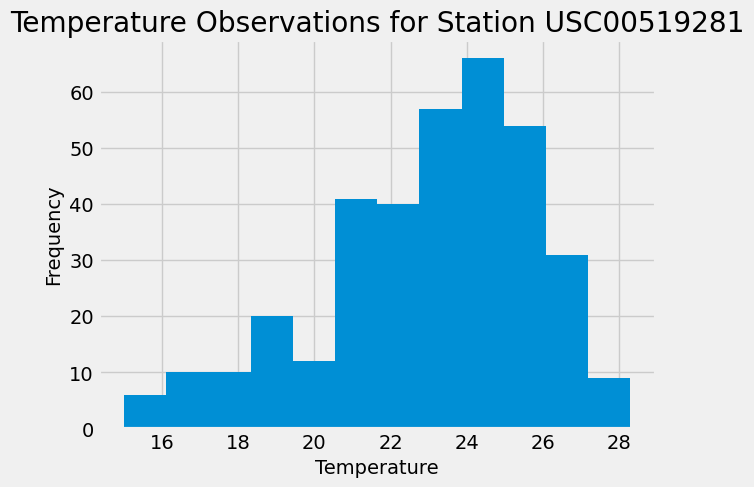

In [200]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

result= session.query(Measurement.date, Measurement.tobs).\
          filter(Measurement.station == most_active_station.station).\
          filter(Measurement.date >'2016-08-18').all()

result_df = pd.DataFrame(result)['tobs']
result_df
plt.hist(result_df,bins=12)

plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Temperature Observations for Station USC00519281')
plt.show()

# Close Session

In [201]:
# Close Session
session.close()